# Análisis Exploratorio de Datos con Python
**Objetivo:** Aplicar Python como herramienta práctica para resolver problemáticas de datos utilizando librerías estándar, simulando un flujo profesional de análisis exploratorio.

Este notebook simula el trabajo de un analista de datos que explora un dataset real, realiza limpieza, visualizaciones y extrae conclusiones significativas. Se siguen buenas prácticas de documentación y claridad visual.

## Paso 1: Cargar un Dataset Real desde una URL

In [1]:
import pandas as pd

# Dataset público de ejemplo: ingresos por país
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Paso 2: Limpieza de Datos con pandas

In [2]:
# Información general
df.info()

# Verificar valores nulos
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [3]:
# Limpieza básica
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df.drop(columns=['Cabin'], inplace=True)  # Muchas nulas
df.head()

C:\Users\basti\AppData\Local\Temp\ipykernel_16860\3767336497.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\basti\AppData\Local\Temp\ipykernel_16860\3767336497.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


## Paso 3: Visualización de Datos con matplotlib y seaborn

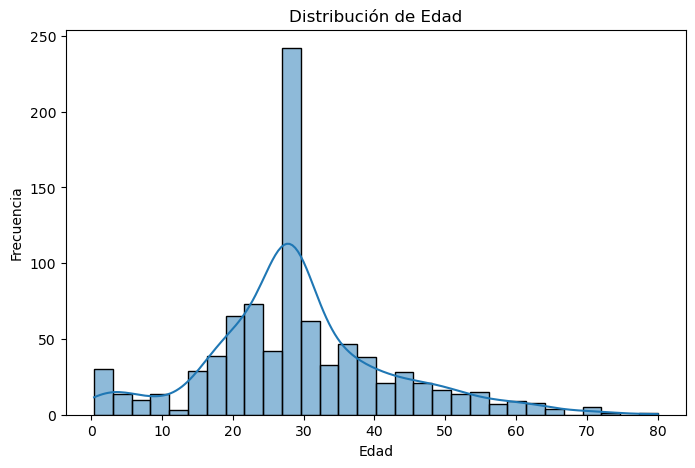

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Distribución de Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

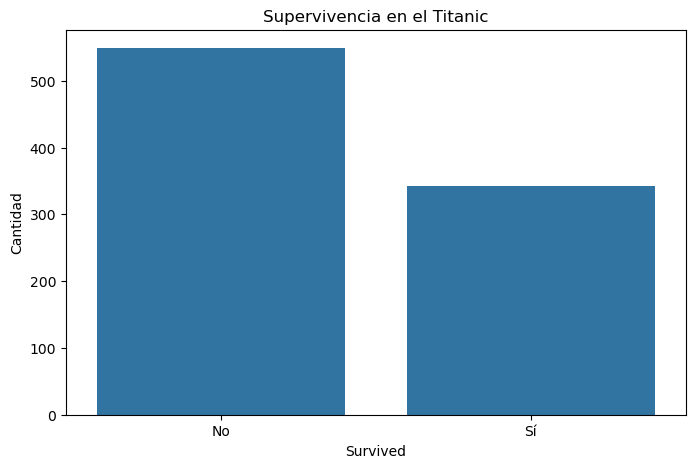

In [5]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Survived')
plt.title('Supervivencia en el Titanic')
plt.xticks([0,1], ['No', 'Sí'])
plt.ylabel('Cantidad')
plt.show()

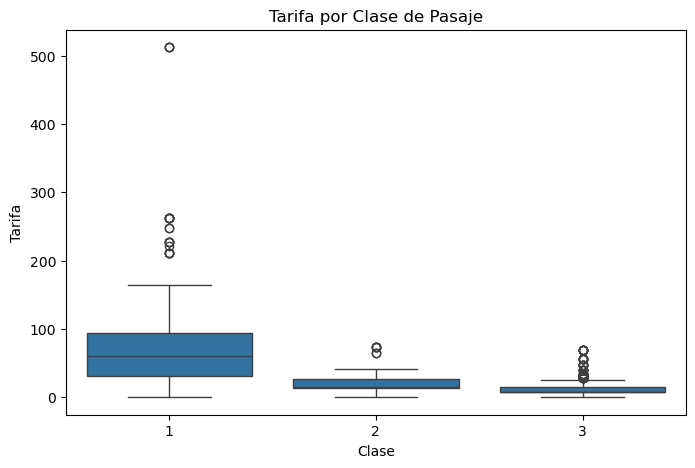

In [6]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='Pclass', y='Fare')
plt.title('Tarifa por Clase de Pasaje')
plt.xlabel('Clase')
plt.ylabel('Tarifa')
plt.show()

## Paso 4: Extracción de Insights Clave

In [7]:
# Tasa de supervivencia por sexo
sobrevivientes_por_sexo = df.groupby('Sex')['Survived'].mean()
print("Tasa de supervivencia por sexo:")
print(sobrevivientes_por_sexo)

# Promedio de edad por clase
edad_promedio = df.groupby('Pclass')['Age'].mean()
print("\nEdad promedio por clase:")
print(edad_promedio)

Tasa de supervivencia por sexo:
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

Edad promedio por clase:
Pclass
1    36.812130
2    29.765380
3    25.932627
Name: Age, dtype: float64


## Buenas Prácticas en Análisis Exploratorio
- Documentar cada paso del análisis.
- Visualizar con propósito: cada gráfico debe responder una pregunta.
- Evitar sesgos al interpretar los datos.
- Crear una narrativa de hallazgos que sirva de base para decisiones.

**Storytelling con datos**: más que mostrar cifras, cuenta una historia: ¿Quién sobrevive más? ¿Importa el costo del pasaje? ¿La edad influye? Este enfoque eleva el valor del análisis.